In [1]:
import os
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In order to work with the datasets it is necessary to put them in a folder called 'raw_data' or modify the following line of code:

In [2]:
os.listdir('raw_data')

['Lisbon_Dataset_FINAL_v24052022.xlsx',
 'TURIN_Dataset-final_anonym_corrected_feb2022.xlsx']

# Pre-Processing 1st Sheet

## Create, Remove and Rename Features

In [3]:
data_torino = pd.read_excel('raw_data/TURIN_Dataset-final_anonym_corrected_feb2022.xlsx')
data_torino.head()

,REF,PARALS_CODALS,PAR_non match,Birth_year,Age_onset (years),Gender (1-male; 2-female),Ethnicity(1-cau; 2-afr; 3-asi),DateOf1stSymptoms,DateOf1stVisit,DateOfDiagnosis,...,Cardiac disease (0-no; 1-yes),Primary cancer (0-no; 1-yes),Major Trauma before onset (0-no; 1-yes),Surgical interventions before onset (0-no; 1-yes),SOD1 Mutation,"C9orf72 repeat-primed PCR result (A=normal; C=normal; B=expansion; Q=special shape, can be ignored for this study)",TARDBP mutation,FUS mutation,MTW Status,MTW Status.1
0,TUR_0001,PAR-2005-001,NaN,1947,56.565400,2,1,2004-04-15,999,2005-01-15,...,0,0,NaN,NaN,0.0,A,0.0,0.0,Matching and updated,Non-matching
1,TUR_0002,PAR-2003-001,NaN,1945,57.247073,1,1,2002-05-15,999,2003-01-15,...,0,0,NaN,NaN,0.0,A,0.0,0.0,Matching and updated,Non-matching
2,TUR_0003,PAR-2010-001,NaN,1947,62.447639,1,1,2010-03-15,999,2010-07-15,...,0,0,NaN,NaN,0.0,A,0.0,0.0,Matching and updated,Non-matching
3,TUR_0004,PAR-2004-001,NaN,1921,82.238859,1,1,2003-12-15,999,2004-12-15,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Matching and updated,Non-matching
4,TUR_0005,PAR-2002-001,NaN,1947,53.962367,2,1,2001-01-15,999,2002-09-15,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Matching and updated,Non-matching


In [4]:
data_torino.columns

Index(['REF', 'PARALS_CODALS', 'PAR_non match', 'Birth_year',
       'Age_onset (years)', 'Gender (1-male; 2-female)',
       'Ethnicity(1-cau; 2-afr; 3-asi)', 'DateOf1stSymptoms', 'DateOf1stVisit',
       'DateOfDiagnosis', 'Dateofdeath_corrected',
       'Date Of Last visit or Death', 'Status (death-1; alive-2)',
       'NIV (0-no; 1-yes)', 'Date_NIV', 'Tracheostomy (0-no; 1-yes)',
       'Date_tracheostomy', 'PEG (0-no; 1-yes)', 'Date_PEG',
       'UMNvsLMN predominance(1-UMN; 2-LMN; 3- both; NA)',
       'Onset (1- Limbs; 2- Bulbar; 3- Axial/Resp; 4- Generalized)',
       'Limb_O ULvsLL  (0-not related; 1-UL; 2- LL; 3-both; 999-not available)',
       'Limbs Predominant Impairment (0-not related; 1-distal; 2-proximal; 3- both; 999-not available)',
       'Limbs Predominant Side (0-not related;1-left, 2-right; 3-both; 999-not available)',
       'Height (m)', 'Weight before 1st symptoms (kg)',
       'Weight at 1st visit (kg)', 'Weightloss >10% (0-no; 1-yes)',
       'ALS familiar h

We can check the percentage of null value in each column:

In [5]:
data_torino.isnull().groupby(data_torino.REF.str[:3]).mean().T

REF,TUR
REF,0.000000
PARALS_CODALS,0.000000
PAR_non match,0.953945
Birth_year,0.000000
Age_onset (years),0.000000
Gender (1-male; 2-female),0.000000
Ethnicity(1-cau; 2-afr; 3-asi),0.000000
DateOf1stSymptoms,0.000000
DateOf1stVisit,0.000000
DateOfDiagnosis,0.000000


<Axes: >

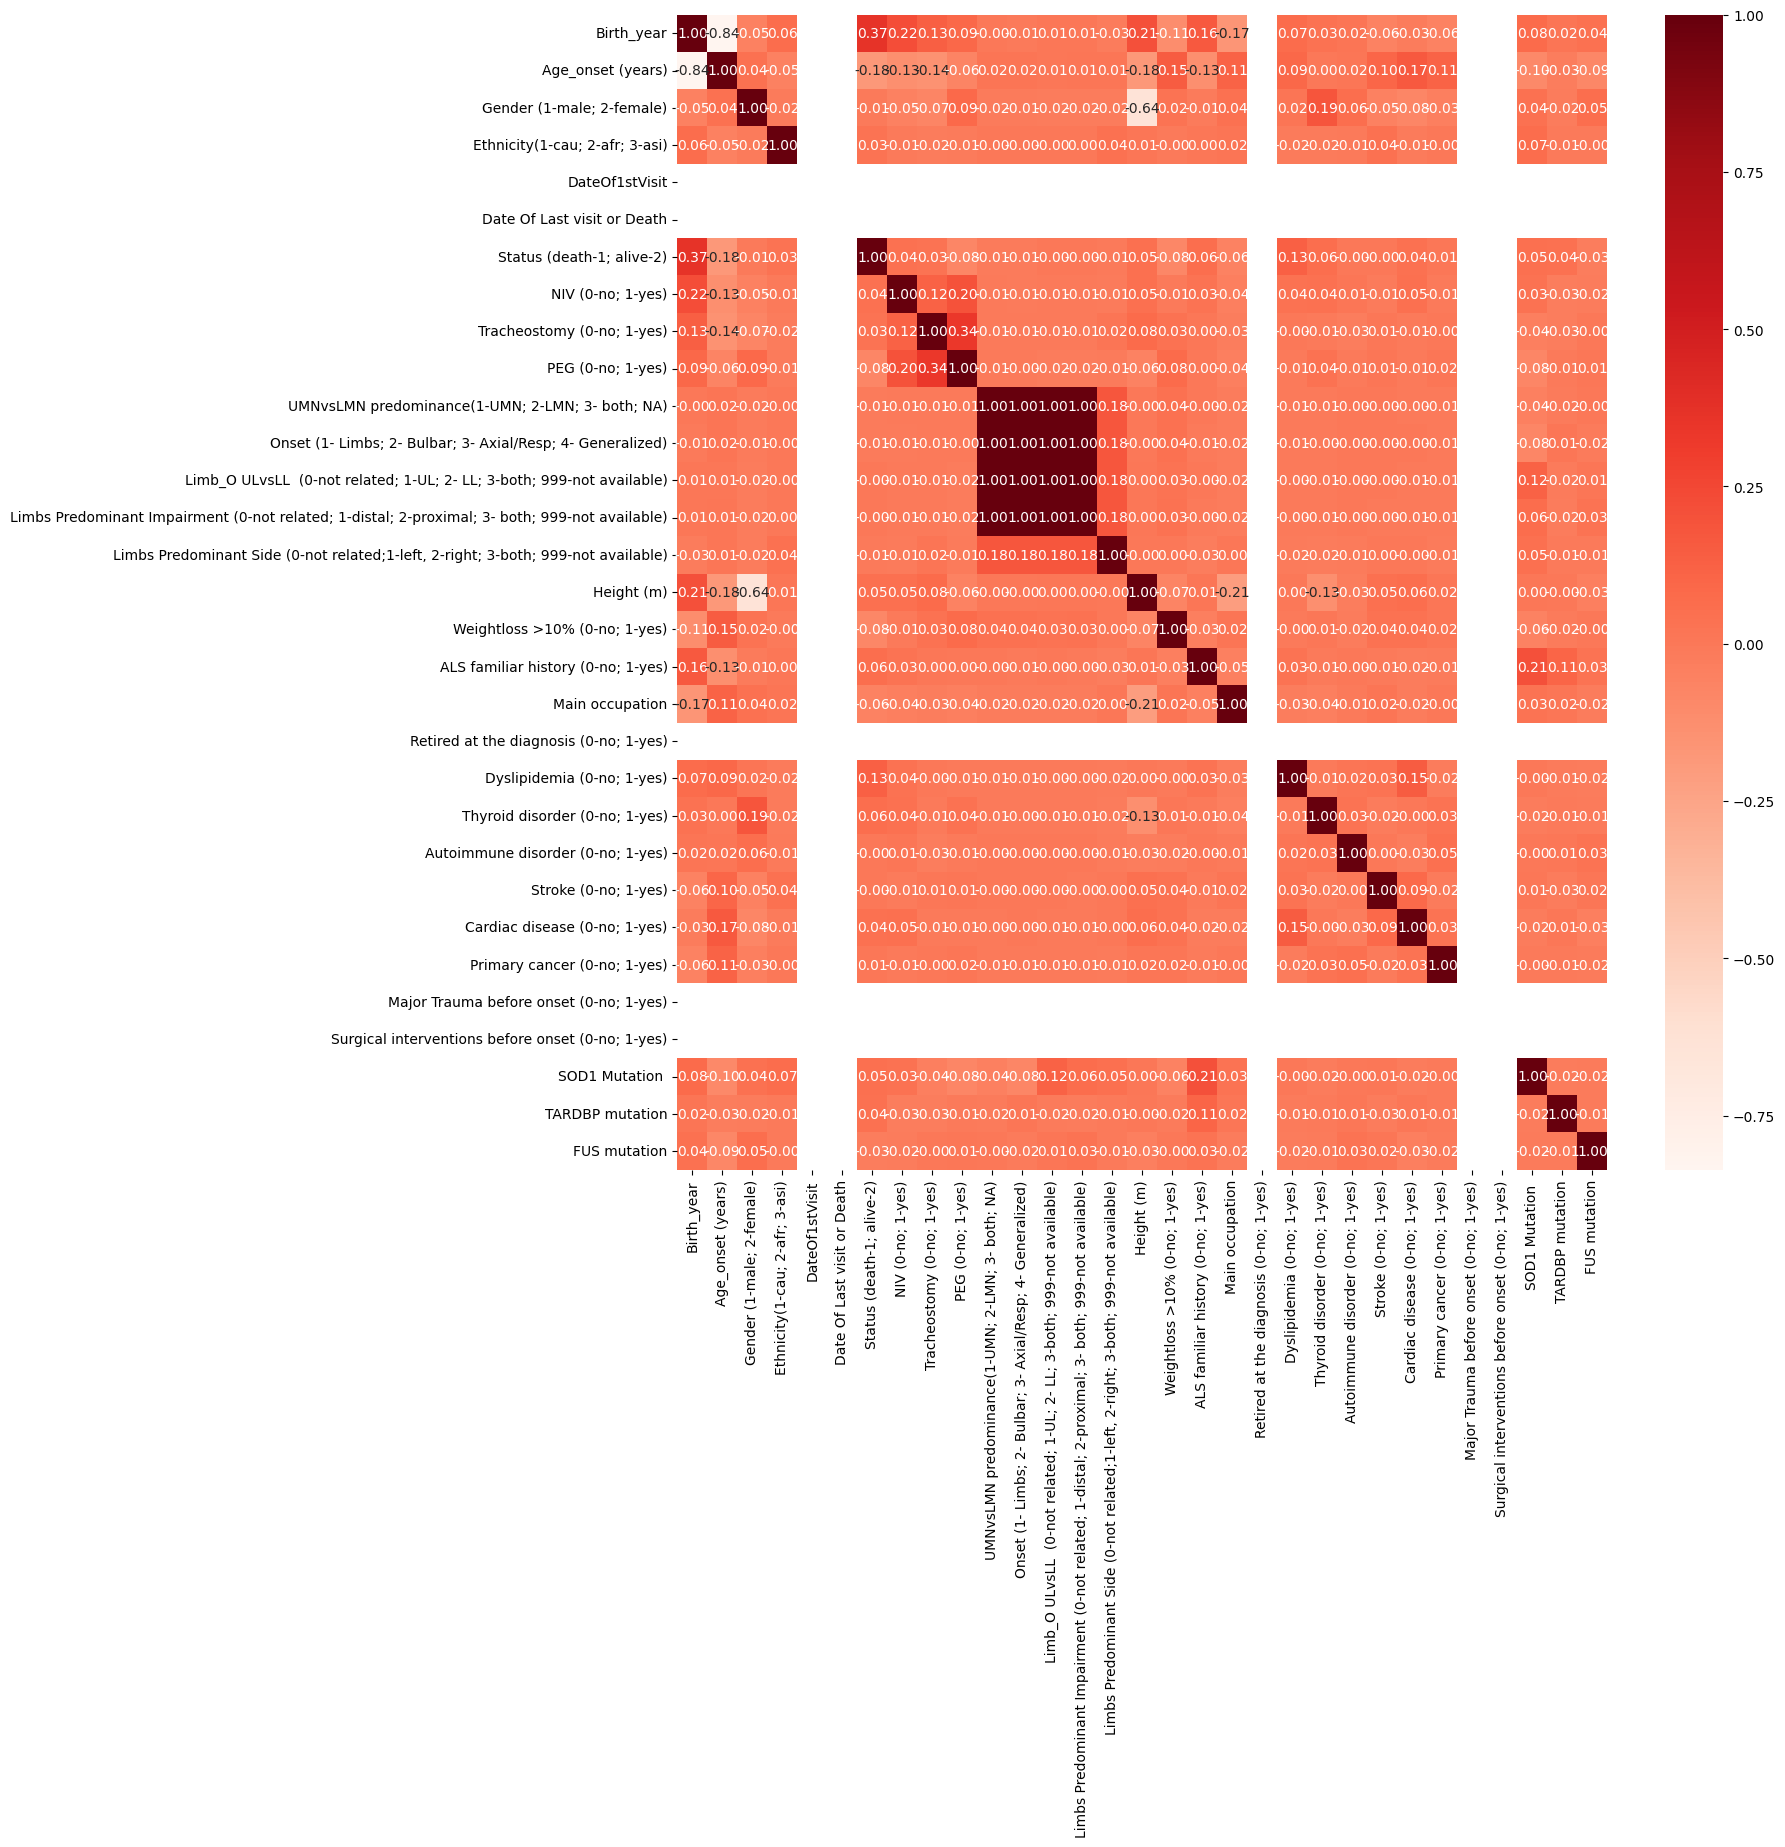

In [6]:
plt.figure(figsize=(15,15))
cor = data_torino.corr(numeric_only = "False")
seaborn.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')

In [7]:
#Convert to DateTime some columns
data_torino['DateOf1stSymptoms'] = pd.to_datetime(data_torino['DateOf1stSymptoms'])
data_torino['DateOfDiagnosis'] = pd.to_datetime(data_torino['DateOfDiagnosis'])
data_torino['Dateofdeath_corrected'] = pd.to_datetime(data_torino['Dateofdeath_corrected'])

data_torino['Date_NIV'] = pd.to_datetime(data_torino['Date_NIV'])
data_torino['Date_tracheostomy'] = pd.to_datetime(data_torino['Date_tracheostomy'])
data_torino['Date_PEG'] = pd.to_datetime(data_torino['Date_PEG'])

In [8]:
#Create new columns
data_torino['WaitingTime'] = (data_torino['DateOf1stSymptoms'] - data_torino['DateOfDiagnosis']) / pd.Timedelta(days=1)

data_torino['Weight before 1st symptoms (kg)'] = pd.to_numeric(data_torino['Weight before 1st symptoms (kg)'], errors='coerce')
data_torino['Weight at 1st visit (kg)'] = pd.to_numeric(data_torino['Weight at 1st visit (kg)'], errors='coerce')

data_torino['WeightRelathion'] = (data_torino['Weight at 1st visit (kg)'] - data_torino['Weight before 1st symptoms (kg)']) / data_torino['Weight at 1st visit (kg)']

In [9]:
to_drop = ['Birth_year', 'DateOf1stSymptoms', 'DateOf1stVisit', 'Ethnicity(1-cau; 2-afr; 3-asi)',
           'Date Of Last visit or Death', 'PARALS_CODALS', 'PAR_non match', 
           'Main occupation', 'Retired at the diagnosis (0-no; 1-yes)', 
           'Weight before 1st symptoms (kg)', 
           'Major Trauma before onset (0-no; 1-yes)', 'Surgical interventions before onset (0-no; 1-yes)',  
           'MTW Status', 'MTW Status.1']

data_torino.drop(to_drop, 
                 axis=1, inplace=True)

data_torino['C9orf72 repeat-primed PCR result (A=normal; C=normal; B=expansion; Q=special shape, can be ignored for this study)'] = data_torino['C9orf72 repeat-primed PCR result (A=normal; C=normal; B=expansion; Q=special shape, can be ignored for this study)'].replace(['A', 'C', 'B', 'Q', '', ' '], [0, 0, 1, np.nan, np.nan, np.nan])

In [10]:
data_torino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 36 columns):
 #   Column                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                              --------------  -----         
 0   REF                                                                                                                 3257 non-null   object        
 1   Age_onset (years)                                                                                                   3257 non-null   float64       
 2   Gender (1-male; 2-female)                                                                                           3257 non-null   int64         
 3   DateOfDiagnosis                                                                                                     3257 non-nul

In [11]:
data_torino.set_index('REF', drop=True, inplace=True)

In [12]:
data_torino.rename(columns={"Gender (1-male; 2-female)":"Gender",
                            "Dateofdeath_corrected":"Date Of Last visit or Death",
                            "Status (death-1; alive-2)":"Status",
                            "NIV (0-no; 1-yes)":"NIV", 
                            "Tracheostomy (0-no; 1-yes)":"Tracheostomy",
                            "PEG (0-no; 1-yes)":"PEG",
                            "UMNvsLMN predominance(1-UMN; 2-LMN; 3- both; NA)":"UMNvsLMN",
                            "Onset (1- Limbs; 2- Bulbar; 3- Axial/Resp; 4- Generalized)":"Onset",
                            "Limbs Predominant Side (0-not related;1-left, 2-right; 3-both; 999-not available)":"Side", 
                            "Limb_O ULvsLL  (0-not related; 1-UL; 2- LL; 3-both; 999-not available)":"ULvsLL",
                            "Limbs Predominant Impairment (0-not related; 1-distal; 2-proximal; 3- both; 999-not available)":"DistProx",
                            "ALS familiar history (0-no; 1-yes)":"ALS familiar history", 
                            "Ever smoked (0-No; 1-yes)":"smoke", 
                            "Blood hypertension (0-No; 1-yes)":"Blood hypertension", 
                            "Diabetes – type I / II (0-No; 1-yes)":"Diabetes – type I / II",
                            "Dyslipidemia (0-no; 1-yes)":"Dyslipidemia",
                            "Thyroid disorder (0-no; 1-yes)":"Thyroid disorder",
                            "Autoimmune disorder (0-no; 1-yes)":"Autoimmune disorder",
                            "Stroke (0-no; 1-yes)":"Stroke",
                            "Cardiac disease (0-no; 1-yes)":"Cardiac disease",
                            "Primary cancer (0-no; 1-yes)":"Primary cancer",
                            "C9orf72 repeat-primed PCR result (A=normal; C=normal; B=expansion; Q=special shape, can be ignored for this study)":"C9orf72 repeat-primed PCR result"}, inplace=True)

In [13]:
print(f"Dati di pazienti deceduti: {len(data_torino[data_torino['Status'] == 1])} \nDati di pazienti vivi: {len(data_torino[data_torino['Status'] == 2])}")

Dati di pazienti deceduti: 2693 
Dati di pazienti vivi: 564


## Feature Engineering

In [14]:
if 'UMNvsLMN' in data_torino.columns or 'Side' in data_torino.columns or 'Onset' in data_torino.columns or 'DistProx' in data_torino.columns or 'ULvsLL' in data_torino.columns:
    data_torino[['UMNvsLMN', 'Onset', 'Side',
       'DistProx', 'ULvsLL']].value_counts()

In [15]:
if 'UMNvsLMN' in data_torino.columns or 'Side' in data_torino.columns or 'Onset' in data_torino.columns or 'DistProx' in data_torino.columns or 'ULvsLL' in data_torino.columns:
    data_torino['UMNvsLMN']=data_torino['UMNvsLMN'].replace(['', 999.0], ['NA', 'NA'])
    data_torino['Onset']=data_torino['Onset'].replace(['', 999], ['NA', 'NA'])
    data_torino['Side']=data_torino['Side'].replace(['', 999], ['NA', 'NA'])
    data_torino['DistProx']=data_torino['DistProx'].replace(['', 999], ['NA', 'NA'])
    data_torino['ULvsLL']=data_torino['ULvsLL'].replace(['', 999], ['NA', 'NA'])

In [16]:
data_torino[['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']][data_torino[['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']].isna().any(axis=1)]

,Blood hypertension,Diabetes – type I / II,Dyslipidemia,Thyroid disorder,Autoimmune disorder,Stroke,Cardiac disease,Primary cancer
REF,,,,,,,,
TUR_0391,NaN,NaN,0,0,0,0,0,0
TUR_0432,NaN,NaN,0,0,0,0,0,0
TUR_0454,NaN,NaN,0,0,0,0,0,0
TUR_0564,NaN,NaN,0,0,0,0,0,0
TUR_0576,NaN,NaN,0,0,0,0,0,0
TUR_0650,NaN,NaN,0,0,0,0,0,0
TUR_0677,NaN,NaN,0,0,0,0,0,0
TUR_0681,NaN,NaN,0,0,0,0,0,0
TUR_0790,NaN,NaN,0,0,0,0,0,0


In [17]:
for index, row in data_torino[['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']].iterrows():
    if row.isnull().values.any() and np.nansum(row.values) >= 1:
        data_torino.loc[index,['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']] = [0 if np.isnan(item) or item == ' ' else item for item in row.values]
        
data_torino[['smoke', 'Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer', 'C9orf72 repeat-primed PCR result']]=data_torino[['smoke', 'Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer', 'C9orf72 repeat-primed PCR result']].replace({'':0, ' ':0, '_':0})

We checked if the mutation had some values different from: nan, 0, 1

In [18]:
print(data_torino['SOD1 Mutation '].unique())
print(data_torino['TARDBP mutation'].unique())
print(data_torino['FUS mutation'].unique())

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]


# Pre-Processing 2nd Sheet

Here we processed the 2nd Sheet with the ALSFRS.

In [19]:
data_torino_survey = pd.read_excel('raw_data/TURIN_Dataset-final_anonym_corrected_feb2022.xlsx', sheet_name=1)

In [20]:
data_torino_survey.columns

Index(['REF', 'PARALS/CODALS', 'N_ALSFRS', 'Date1', 'ALSFRS_1', 'ALSFRS_2',
       'ALSFRS_3', 'ALSFRS_4', 'ALSFRS_5', 'ALSFRS_6', 'ALSFRS_7', 'ALSFRS_8',
       'ALSFRS_9', 'ALSFRS_10', 'ALSFRS_11', 'ALSFRS_12', 'ALSFRS_TOT'],
      dtype='object')

In [21]:
data_torino_survey.set_index('REF', drop=True, inplace=True)

In [22]:
data_torino_survey['Date1'] = pd.to_datetime(data_torino_survey['Date1'])

In [23]:
data_torino_survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15006 entries, TUR_2892 to TUR_2836
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PARALS/CODALS  15006 non-null  object        
 1   N_ALSFRS       15006 non-null  object        
 2   Date1          15006 non-null  datetime64[ns]
 3   ALSFRS_1       15006 non-null  int64         
 4   ALSFRS_2       15006 non-null  int64         
 5   ALSFRS_3       15006 non-null  int64         
 6   ALSFRS_4       15006 non-null  int64         
 7   ALSFRS_5       15006 non-null  int64         
 8   ALSFRS_6       15006 non-null  int64         
 9   ALSFRS_7       15006 non-null  int64         
 10  ALSFRS_8       15006 non-null  int64         
 11  ALSFRS_9       15006 non-null  int64         
 12  ALSFRS_10      15006 non-null  int64         
 13  ALSFRS_11      15006 non-null  int64         
 14  ALSFRS_12      15006 non-null  int64         
 15  ALSFRS_TOT    

In [24]:
data_torino_survey = data_torino_survey.join(data_torino[['DateOfDiagnosis']])
data_torino_survey.head()

,PARALS/CODALS,N_ALSFRS,Date1,ALSFRS_1,ALSFRS_2,ALSFRS_3,ALSFRS_4,ALSFRS_5,ALSFRS_6,ALSFRS_7,ALSFRS_8,ALSFRS_9,ALSFRS_10,ALSFRS_11,ALSFRS_12,ALSFRS_TOT,DateOfDiagnosis
REF,,,,,,,,,,,,,,,,,
TUR_0001,PAR-2005-001,PAR-2005-001-A1,2005-09-19,4,4,4,4,4,4,4,3,3,4,4,4,46,2005-01-15
TUR_0001,PAR-2005-001,PAR-2005-001-A2,2005-11-11,4,4,4,4,4,4,4,3,3,4,4,4,46,2005-01-15
TUR_0001,PAR-2005-001,PAR-2005-001-A3,2006-01-13,4,4,4,4,4,4,4,3,3,4,4,4,46,2005-01-15
TUR_0001,PAR-2005-001,PAR-2005-001-A4,2007-08-31,4,4,3,3,3,4,4,3,2,4,4,4,42,2005-01-15
TUR_0001,PAR-2005-001,PAR-2005-001-A5,2008-04-24,4,4,3,2,2,2,2,0,0,3,3,2,27,2005-01-15


In [25]:
data_torino_survey['SurveyFromDiagnosis'] = (data_torino_survey['Date1'] - data_torino_survey['DateOfDiagnosis']) / pd.Timedelta(days=1)

In [26]:
to_drop = ['PARALS/CODALS', 'N_ALSFRS', 'DateOfDiagnosis']

data_torino_survey.drop(to_drop, 
                 axis=1, inplace=True)

In [27]:
data_torino_survey.head()

,Date1,ALSFRS_1,ALSFRS_2,ALSFRS_3,ALSFRS_4,ALSFRS_5,ALSFRS_6,ALSFRS_7,ALSFRS_8,ALSFRS_9,ALSFRS_10,ALSFRS_11,ALSFRS_12,ALSFRS_TOT,SurveyFromDiagnosis
REF,,,,,,,,,,,,,,,
TUR_0001,2005-09-19,4,4,4,4,4,4,4,3,3,4,4,4,46,247.0
TUR_0001,2005-11-11,4,4,4,4,4,4,4,3,3,4,4,4,46,300.0
TUR_0001,2006-01-13,4,4,4,4,4,4,4,3,3,4,4,4,46,363.0
TUR_0001,2007-08-31,4,4,3,3,3,4,4,3,2,4,4,4,42,958.0
TUR_0001,2008-04-24,4,4,3,2,2,2,2,0,0,3,3,2,27,1195.0


# Pre-Processing 3rd Sheet

In [28]:
data_torino_fvc = pd.read_excel('raw_data/TURIN_Dataset-final_anonym_corrected_feb2022.xlsx', sheet_name=2)
data_torino_fvc.head()

,REF,CODICE,N_SPIRO,DATA SPIRO,%FVC
0,TUR_0167,PAR-1995-005,PAR-1995-005-S1,1998-02-09,92.2
1,TUR_0167,PAR-1995-005,PAR-1995-005-S2,1999-07-14,109.8
2,TUR_0167,PAR-1995-005,PAR-1995-005-S3,2000-12-11,101.0
3,TUR_0167,PAR-1995-005,PAR-1995-005-S4,2001-07-04,99.0
4,TUR_0167,PAR-1995-005,PAR-1995-005-S5,2002-07-24,86.7


In [29]:
data_torino_fvc['DATA SPIRO'] = pd.to_datetime(data_torino_fvc['DATA SPIRO'])

In [30]:
data_torino_fvc.set_index('REF', drop=True, inplace=True)

In [31]:
data_torino_fvc = data_torino_fvc.join(data_torino[['DateOfDiagnosis']])

In [32]:
data_torino_fvc['FVCFromDiagnosis'] = (data_torino_fvc['DATA SPIRO'] - data_torino_fvc['DateOfDiagnosis']) / pd.Timedelta(days=1)

In [33]:
data_torino_fvc.head()

,CODICE,N_SPIRO,DATA SPIRO,%FVC,DateOfDiagnosis,FVCFromDiagnosis
REF,,,,,,
TUR_0001,PAR-2005-001,PAR-2005-001-S1,2008-04-29,38.1,2005-01-15,1200.0
TUR_0002,PAR-2003-001,PAR-2003-001-S1,2002-12-30,74.6,2003-01-15,-16.0
TUR_0002,PAR-2003-001,PAR-2003-001-S2,2003-03-19,80.6,2003-01-15,63.0
TUR_0002,PAR-2003-001,PAR-2003-001-S3,2003-07-02,53.7,2003-01-15,168.0
TUR_0003,PAR-2010-001,PAR-2010-001-S1,2010-09-03,85.5,2010-07-15,50.0


# Check censored between 1st, 2nd and 3rd Sheets

In [34]:
data_torino_min_survey = data_torino_survey.reset_index().groupby('REF')['SurveyFromDiagnosis'].min()
data_torino_min_survey[data_torino_min_survey < 15 ].sort_values()

REF
TUR_1303   -551.0
TUR_2044   -362.0
TUR_2398   -240.0
TUR_2231   -228.0
TUR_1742   -212.0
            ...  
TUR_0733     14.0
TUR_0675     14.0
TUR_0668     14.0
TUR_0078     14.0
TUR_0076     14.0
Name: SurveyFromDiagnosis, Length: 1421, dtype: float64

In [35]:
data_torino['Date Of Last visit or Death'].isnull().sum()

564

In [36]:
def check_if_list(to_be_analyzed):
    if isinstance(to_be_analyzed, pd.Series) and len(to_be_analyzed) > 1:
        date = max(to_be_analyzed)
    else:
        date = to_be_analyzed
    return date

for index in data_torino.index:
    dates = []
    
    if pd.isna(data_torino.at[index, 'Date Of Last visit or Death']) and (index in data_torino_survey.index) and (index in data_torino_fvc.index):
        date_survey = check_if_list(data_torino_survey.at[index, 'Date1'])
        date_fvc = check_if_list(data_torino_fvc.at[index, 'DATA SPIRO'])
        dates = [data_torino.at[index, 'Date_NIV'], data_torino.at[index, 'Date_tracheostomy'], 
                 data_torino.at[index, 'Date_PEG'], date_survey, 
                 date_fvc]
    elif pd.isna(data_torino.at[index, 'Date Of Last visit or Death']) and (index in data_torino_survey.index):
        date_survey = check_if_list(data_torino_survey.at[index, 'Date1'])
        dates = [data_torino.at[index, 'Date_NIV'], data_torino.at[index, 'Date_tracheostomy'], 
                 data_torino.at[index, 'Date_PEG'], date_survey]
    elif pd.isna(data_torino.at[index, 'Date Of Last visit or Death']) and (index in data_torino_fvc.index):
        date_fvc = check_if_list(data_torino_fvc.at[index, 'DATA SPIRO'])
        dates = [data_torino.at[index, 'Date_NIV'], data_torino.at[index, 'Date_tracheostomy'], 
                 data_torino.at[index, 'Date_PEG'], date_fvc]
    elif pd.isna(data_torino.at[index, 'Date Of Last visit or Death']):
        dates = [data_torino.at[index, 'Date_NIV'], data_torino.at[index, 'Date_tracheostomy'], 
                 data_torino.at[index, 'Date_PEG']]
    else:
        pass
    
    if len(dates) != 0:
        data_torino.loc[index, 'Date Of Last visit or Death'] = pd.Series(dates).max()

In [37]:
for index in data_torino.index:
    dates = []
    
    if pd.isna(data_torino.at[index, 'Date_NIV']) and (index in data_torino_survey.index) and (index in data_torino_fvc.index):
        date_survey = check_if_list(data_torino_survey.at[index, 'Date1'])
        date_fvc = check_if_list(data_torino_fvc.at[index, 'DATA SPIRO'])
        dates = [data_torino.at[index, 'Date Of Last visit or Death'], date_survey, date_fvc]
    elif pd.isna(data_torino.at[index, 'Date_NIV']) and (index in data_torino_survey.index):
        date_survey = check_if_list(data_torino_survey.at[index, 'Date1'])
        dates = [data_torino.at[index, 'Date Of Last visit or Death'], date_survey]
    elif pd.isna(data_torino.at[index, 'Date_NIV']) and (index in data_torino_fvc.index):
        date_fvc = check_if_list(data_torino_fvc.at[index, 'DATA SPIRO'])
        dates = [data_torino.at[index, 'Date Of Last visit or Death'], date_fvc]
    elif pd.isna(data_torino.at[index, 'Date_NIV']):
        dates = [data_torino.at[index, 'Date Of Last visit or Death']]
    
    if len(dates) != 0:
        data_torino.loc[index, 'Date_NIV'] = pd.Series(dates).max()
        
    dates = []
    
    if pd.isna(data_torino.at[index, 'Date_PEG']) and (index in data_torino_survey.index) and (index in data_torino_fvc.index):
        date_survey = check_if_list(data_torino_survey.at[index, 'Date1'])
        date_fvc = check_if_list(data_torino_fvc.at[index, 'DATA SPIRO'])
        dates = [data_torino.at[index, 'Date Of Last visit or Death'], date_survey, date_fvc]
    elif pd.isna(data_torino.at[index, 'Date_PEG']) and (index in data_torino_survey.index):
        date_survey = check_if_list(data_torino_survey.at[index, 'Date1'])
        dates = [data_torino.at[index, 'Date Of Last visit or Death'], date_survey]
    elif pd.isna(data_torino.at[index, 'Date_PEG']) and (index in data_torino_fvc.index):
        date_fvc = check_if_list(data_torino_fvc.at[index, 'DATA SPIRO'])
        dates = [data_torino.at[index, 'Date Of Last visit or Death'], date_fvc]
    elif pd.isna(data_torino.at[index, 'Date_PEG']):
        dates = [data_torino.at[index, 'Date Of Last visit or Death']]
    
    print(data_torino.at[index, 'Date_PEG'], dates)
    if len(dates) != 0:
        data_torino.loc[index, 'Date_PEG'] = pd.Series(dates).max()

NaT [Timestamp('2010-05-10 00:00:00'), Timestamp('2009-05-01 00:00:00'), Timestamp('2008-04-29 00:00:00')]
2004-05-11 00:00:00 []
2011-06-27 00:00:00 []
NaT [Timestamp('2007-09-15 00:00:00'), Timestamp('2004-12-06 00:00:00')]
NaT [Timestamp('2004-02-03 00:00:00'), Timestamp('2003-04-13 00:00:00'), Timestamp('2003-01-28 00:00:00')]
2009-07-22 00:00:00 []
2005-10-16 00:00:00 []
NaT [Timestamp('2017-02-13 00:00:00'), Timestamp('2017-02-13 00:00:00')]
2009-09-30 00:00:00 []
NaT [Timestamp('2014-06-20 00:00:00'), Timestamp('2014-06-12 00:00:00')]
2016-06-10 00:00:00 []
NaT [Timestamp('1998-09-05 00:00:00')]
1997-03-17 00:00:00 []
2001-08-16 00:00:00 []
NaT [Timestamp('2007-05-01 00:00:00'), Timestamp('2003-09-29 00:00:00')]
2012-05-23 00:00:00 []
NaT [Timestamp('2004-11-15 00:00:00'), Timestamp('2004-04-05 00:00:00'), Timestamp('2001-07-13 00:00:00')]
2007-12-15 00:00:00 []
NaT [Timestamp('1997-04-09 00:00:00')]
NaT [Timestamp('2004-11-18 00:00:00')]
NaT [Timestamp('1997-04-09 00:00:00')]
N

In [38]:
data_torino['Date Of Last visit or Death'].isnull().sum()

146

In [39]:
data_torino.dropna(subset=['Date Of Last visit or Death'], inplace=True)

In [40]:
data_torino['Date Of Last visit or Death'].isnull().sum()

0

In [41]:
data_torino['NIVFromDiagnosis'] = (data_torino['Date_NIV'] - data_torino['DateOfDiagnosis']) / pd.Timedelta(days=1)
data_torino['TracheostomyFromDiagnosis'] = (data_torino['Date_tracheostomy'] - data_torino['DateOfDiagnosis']) / pd.Timedelta(days=1)
data_torino['PEGFromDiagnosis'] = (data_torino['Date_PEG'] - data_torino['DateOfDiagnosis']) / pd.Timedelta(days=1)
data_torino['DateToDeathFromDiagnosis'] = (data_torino['Date Of Last visit or Death'] - data_torino['DateOfDiagnosis'] + pd.Timedelta(days=15)) / pd.Timedelta(days=1)

to_drop = ['Date_tracheostomy', 'Tracheostomy', 'DateOfDiagnosis']

data_torino.drop(to_drop, 
                 axis=1, inplace=True)

# Save in Excel File

In [42]:
with pd.ExcelWriter('preprocessed_data/torino.xlsx') as writer:  
    data_torino.to_excel(writer, sheet_name='Static vars_corr')
    data_torino_survey.to_excel(writer, sheet_name='ALSFRS-R')
    data_torino_fvc.to_excel(writer, sheet_name='FVC')